In [52]:
! pip install unidecode

In [176]:
import pandas as pd 
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.datasets import load_wine




In [20]:
df1 = pd.read_csv('washing-machines.csv')
df2 = pd.read_csv('buy-apartment.csv')
df3 = pd.read_csv('buy-villa.csv')
df4 = pd.read_csv('buy-office.csv')   
df5 = pd.read_csv('car.csv')
frames = [df1 , df2 , df3 , df4 , df5]
df = pd.concat(frames)
# df = result.drop_duplicates()
df = df.reset_index()
df = df.drop(df.columns[0:2], axis=1)
df.head()

,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,home-kitchen,appliance,washing-machines,ماشین لباسشویی دوقلوی کودک,سازنده برند قدیمی ناسیونال,https://divar.ir/v/ماشین-لباسشویی-دوقلوی-کودک_...,یک ربع پیش در تهران، جوانمرد قصاب,۱٬۸۵۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,home-kitchen,appliance,washing-machines,لباسشویی بست BOST,لباسشویی کاملا سالم خدارو شکر مشکلی نداره از ه...,https://divar.ir/v/لباسشویی-بست-bost_ماشین-لبا...,نیم ساعت پیش در تهران، آذربایجان,۸٬۰۰۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,home-kitchen,appliance,washing-machines,ماشین لباسشویی سامسونگ,ماشین لباسشویی سامسونگ کره ای اصلی سالم تمیز ب...,https://divar.ir/v/ماشین-لباسشویی-سامسونگ_ماشی...,نیم ساعت پیش در تهران، ابن بابویه,۵٬۵۰۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,home-kitchen,appliance,washing-machines,موتور لباسشویی هایر,یک عدد موتور لباسشویی برای همه ماشین لباسشویی ...,https://divar.ir/v/موتور-لباسشویی-هایر_ماشین-ل...,۱ ساعت پیش در تهران، جنت‌آباد جنوبی,۵۰۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,home-kitchen,appliance,washing-machines,لباسشوئی سامسونگ,ساعات پاسخگویی ۲۰-۹\n\nتوجه:\nقیمت کالا مقطوع ...,https://divar.ir/v/لباسشوئی-سامسونگ_ماشین-لباس...,۱ ساعت پیش در تهران، جنت‌آباد شمالی,۱۲٬۰۰۰٬۰۰۰,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.to_csv('Dataset_Divar.csv')

In [168]:
df = pd.read_csv('Dataset_Divar.csv')
df = df.drop(df.columns[0], axis=1)

In [169]:
df = df.drop(columns=['CPU','RAM','color','mileage'])

In [170]:

#### clear value of columns

drop_index = df[ (df['price'] == "ویلای جنگلی-کوهستانی") | 
                (df['price'] == "ویلای جنگلی") | 
                (df['price'] == "قسط") | 
                (df['price'] == "سایر") ].index
df = df.drop(drop_index)

###convert NaN to zero 
df["price"] = df['price'].fillna('0')
df["size"] = df['size'].fillna('0')
df["year"] = df['year'].fillna('0')
df["room_number"] = df['room_number'].fillna('0')

###convert persian to en
df['price'] = [unidecode(numbers) for numbers in df['price']]
df['size'] = [unidecode(numbers) for numbers in df['size']]
df['year'] = [unidecode(numbers) for numbers in df['year']]
df['room_number'] = [unidecode(numbers) for numbers in df['room_number']]

### delete , and NAN
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('NAN','0')
df['room_number'] = df['room_number'].str.replace('+','')

##convert strings into integers
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['room_number'] = pd.to_numeric(df['room_number'], errors='coerce')


C:\Users\JAHANN~1\AppData\Local\Temp/ipykernel_748/425534407.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['room_number'] = df['room_number'].str.replace('+','')


In [171]:
df = df.reset_index()

In [174]:
df.corr()

,index,price,size,year,room_number
index,1.000000,0.023488,0.023108,0.045834,-0.011991
price,0.023488,1.000000,0.769367,0.168110,0.220374
size,0.023108,0.769367,1.000000,0.244896,0.308174
year,0.045834,0.168110,0.244896,1.000000,0.777734
room_number,-0.011991,0.220374,0.308174,0.777734,1.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1017 non-null   int64  
 1   cat1         1017 non-null   object 
 2   cat2         1017 non-null   object 
 3   cat3         1017 non-null   object 
 4   title        1017 non-null   object 
 5   description  1017 non-null   object 
 6   url          1017 non-null   object 
 7   sub_title    1017 non-null   object 
 8   price        1016 non-null   float64
 9   size         1017 non-null   int64  
 10  year         1017 non-null   int64  
 11  room_number  1017 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 95.5+ KB


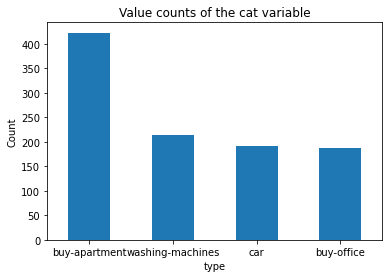

In [182]:
######Value counts of the cat variable

df.cat3.value_counts().plot(kind="bar")
plt.title("Value counts of the cat variable")
plt.xlabel("type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

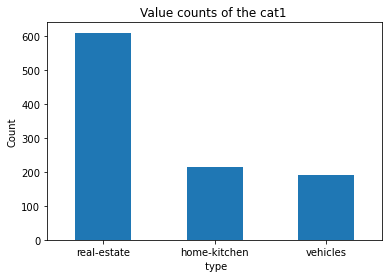

In [183]:
df.cat1.value_counts().plot(kind="bar")
plt.title("Value counts of the cat1 ")
plt.xlabel(" type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

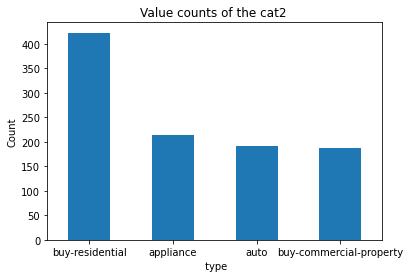

In [184]:
df.cat2.value_counts().plot(kind="bar")
plt.title("Value counts of the cat2 ")
plt.xlabel(" type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

minimum of price  : 0.0
maximum of price  : 250000000000.0
mean of price  : 3024927846.0826774
variance  of price  : 1.655265704031468e+20


<AxesSubplot:ylabel='Density'>

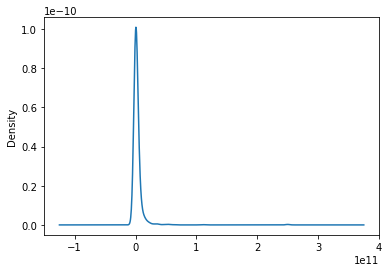

In [179]:
print('minimum of price  :', df.price.min() )
print('maximum of price  :', df.price.max() )
print('mean of price  :', df.price.mean() )
print('variance  of price  :', df.price.var () )
df['price'].plot(kind='kde')

In [180]:
df.duplicated().sum()

0

In [181]:
df.to_csv('Dataset_Divar_EDA.csv')